In [1]:
#Lab06

In [2]:
# Load libraries
import pandas as pd
#pd.set_option('display.max_rows', 500)
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

In [3]:
df=pd.read_excel('realEstate.xlsx')

df=df.dropna()
df.head()

Region  price2018  price2000  purchacingPower2017  crime2019  \
0           Portugal   108016.0      53344                100.0       32.6   
1         Continente   109778.0      53935                100.7       32.1   
2              Norte    80153.0      47145                 92.1       28.1   
3         Alto Minho    50090.0      26874                 79.7       28.7   
4  Arcos de Valdevez    30437.0      22576                 67.8       26.5   

   crime1993  wage2018  IMT2018percapita  IMI2018percapita  Waste2018  \
0       30.8    1166.9              97.6             146.8   0.512959   
1       30.9    1170.3             100.3             149.2   0.510957   
2       23.0    1056.6              55.0             120.2   0.469846   
3       18.0     978.1              36.6             115.1   0.469507   
4       16.2     882.1              20.2              96.9   0.396206   

   WasteSel2018  
0      0.109483  
1      0.107298  
2      0.081176  
3      0.080048  
4      0.052423

In [4]:
df

Region  price2018  price2000  purchacingPower2017  crime2019  \
0             Portugal   108016.0      53344                100.0       32.6   
1           Continente   109778.0      53935                100.7       32.1   
2                Norte    80153.0      47145                 92.1       28.1   
3           Alto Minho    50090.0      26874                 79.7       28.7   
4    Arcos de Valdevez    30437.0      22576                 67.8       26.5   
..                 ...        ...        ...                  ...        ...   
347      Ribeira Brava    34080.0      17867                 68.4       25.9   
348         Santa Cruz    95380.0      68514                 71.5       14.3   
349            Santana    25299.0      15434                 58.3       19.9   
350        São Vicente    45500.0      20604                 61.0       17.3   
352        Porto Santo    74163.0      49418                 93.5       31.8   

     crime1993  wage2018  IMT2018percapita  IMI2018percapita  Waste2018  \
0         30.8    1166.9              97.6             146.8   0.512959   
1         30.9    1170.3             100.3             149.2   0.510957   
2         23.0    1056.6              55.0             120.2   0.469846   
3         18.0     978.1              36.6             115.1   0.469507   
4         16.2     882.1              20.2              96.9   0.396206   
..         ...       ...               ...               ...        ...   
347       22.4     895.3              29.6              63.0   0.426618   
348       25.0    1084.3              46.7             104.6   0.398313   
349       26.5     862.4               8.6              62.6   0.408434   
350       46.2     854.1              24.3              87.3   0.388295   
352       24.4    1142.9              57.0             285.0   1.165898   

     WasteSel2018  
0        0.109483  
1        0.107298  
2        0.081176  
3        0.080048  
4        0.052423  
..            ...  
347      0.098271  
348      0.088227  
349      0.087468  
350      0.086720  
352      0.707036  

[341 rows x 11 columns]

In [5]:
X=df.drop("Region",axis=1)
X.dtypes

price2018              float64
price2000                int64
purchacingPower2017    float64
crime2019              float64
crime1993              float64
wage2018               float64
IMT2018percapita       float64
IMI2018percapita       float64
Waste2018              float64
WasteSel2018           float64
dtype: object

In [6]:
pipeline = Pipeline([('scaling', StandardScaler()), ('pca', PCA(n_components=3))])

principalComponents=pipeline.fit_transform(X)

In [7]:
pd.DataFrame(principalComponents)

0         1         2
0    1.972826 -1.198204  0.136065
1    2.005852 -1.252115  0.087374
2    0.582760 -0.974156 -0.041264
3   -0.432546 -0.046321  0.237438
4   -1.497081  0.214608  0.228310
..        ...       ...       ...
336 -1.267692  0.385313  0.391458
337  0.053560 -1.485031 -1.389320
338 -1.840092  0.506480  0.216991
339 -1.072990  0.251504  0.456633
340  5.802427  3.826544 -1.314745

[341 rows x 3 columns]

In [8]:
pipeline[1].explained_variance_ratio_

array([0.59161215, 0.16106816, 0.06103431])

In [9]:
## View the ratio of explained variance
sum(pipeline[1].explained_variance_ratio_)

0.8137146211505711

In [10]:
Comp=pd.DataFrame(pipeline[1].components_).T

In [11]:

Comp

0         1         2
0  0.363071 -0.145598 -0.376953
1  0.314375 -0.360249 -0.312781
2  0.311255 -0.436224  0.167600
3  0.302549  0.205530  0.627603
4  0.322923 -0.053272  0.481302
5  0.210538 -0.522779  0.103148
6  0.340475  0.208544 -0.254828
7  0.343871  0.212630 -0.101260
8  0.325084  0.387359 -0.081231
9  0.304099  0.318753 -0.118401

In [12]:
df.columns[0:]

Index(['Region', 'price2018', 'price2000', 'purchacingPower2017', 'crime2019',
       'crime1993', 'wage2018', 'IMT2018percapita', 'IMI2018percapita',
       'Waste2018', 'WasteSel2018'],
      dtype='object')

In [13]:
Comp['variables']=df.columns[1:]
Comp=Comp.set_index('variables')

In [14]:
Comp.dtypes

0    float64
1    float64
2    float64
dtype: object

In [15]:
#
def moreThan01(val):
    color = 'red' if val > 0.1 else 'black'
    return 'color: %s' % color

Comp1=Comp.sort_values(by=[0, 1, 2], ascending=False)

s = Comp1.style.applymap(moreThan01)
s





In [16]:

import numpy as np
from numpy.linalg import svd
def varimax(Phi, gamma = 1.0, q = 20, tol = 1e-6):
    from scipy.linalg import svd
    p,k = Phi.shape
    R = np.eye(k)
    d=0
    for i in range(q):
        d_old = d
        Lambda = np.dot(Phi, R)
        u,s,vh = svd(np.dot(Phi.T,np.asarray(Lambda)**3 - (gamma/p) * np.dot(Lambda, np.diag(np.diag(np.dot(Lambda.T,Lambda))))))
        R = np.dot(u,vh)
        d = np.sum(s)
        if d_old!=0 and d/d_old < 1 + tol: break
    return np.dot(Phi, R)

In [17]:
import numpy as np

rot_comps = varimax(Comp)


In [18]:
#rot_comps

In [19]:
Comp1=pd.DataFrame(rot_comps)

In [20]:
Comp1

0         1         2
0  0.357865 -0.347737 -0.214767
1  0.182294 -0.495110 -0.219267
2 -0.074974 -0.522058  0.192601
3  0.045108  0.050224  0.723261
4 -0.008642 -0.186997  0.551114
5 -0.164236 -0.543472  0.076999
6  0.470298 -0.031651 -0.046571
7  0.405968 -0.019052  0.092405
8  0.473936  0.138197  0.136421
9  0.439762  0.089916  0.081377

In [21]:
Comp1['variables']=df.columns[1:]
Comp1s=Comp1.set_index('variables')

In [22]:
#
def moreThan05(val):
    color = 'red' if val > 0.35 or val<-0.35 else 'black'
    return 'color: %s' % color

Comp1s=Comp1s.sort_values(by=[0, 1, 2], ascending=False)

s = Comp1s.style.applymap(moreThan05)
s

In [23]:
Comp1=pd.DataFrame(principalComponents)

In [24]:
Comp1

0         1         2
0    1.972826 -1.198204  0.136065
1    2.005852 -1.252115  0.087374
2    0.582760 -0.974156 -0.041264
3   -0.432546 -0.046321  0.237438
4   -1.497081  0.214608  0.228310
..        ...       ...       ...
336 -1.267692  0.385313  0.391458
337  0.053560 -1.485031 -1.389320
338 -1.840092  0.506480  0.216991
339 -1.072990  0.251504  0.456633
340  5.802427  3.826544 -1.314745

[341 rows x 3 columns]

C:\Users\profc\AppData\Roaming\Python\Python38\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


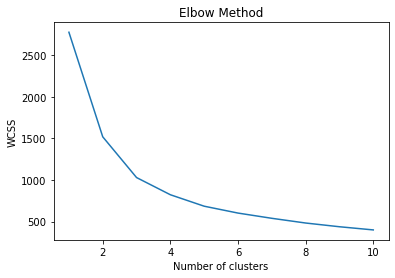

In [25]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
wcss = []
for i in range(1, 11):
    model =KMeans(n_clusters=i, random_state=1)
    model.fit(Comp1)
    wcss.append(model.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
from sklearn import metrics
kmeans_model = KMeans(n_clusters=3, random_state=1).fit(Comp1)
labels = kmeans_model.labels_
metrics.silhouette_score(Comp1, labels, metric='euclidean')

0.4299584387809169

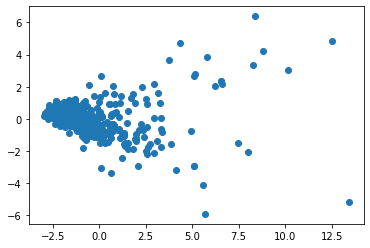

In [27]:
plt.scatter(Comp1[0], Comp1[1])


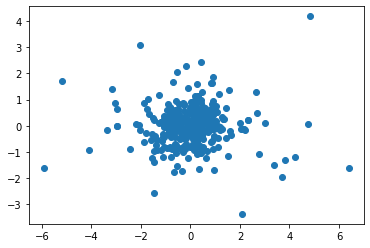

In [28]:
plt.scatter(Comp1[1], Comp1[2])

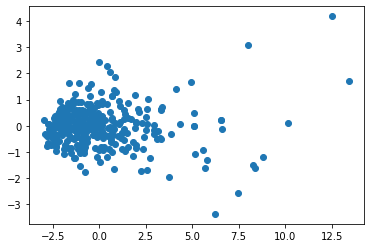

In [29]:
plt.scatter(Comp1[0], Comp1[2])

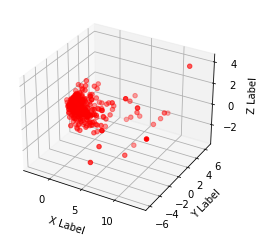

In [30]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(Comp1[0], Comp1[1], Comp1[2], c='r', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()